# PROJECT : DATA ANALYSIS(RISE AND FALL OF PROGRAMMING LANGUAGES)

In [14]:
# Load libraries
library(readr)
library(dplyr)
library(ggplot2)

# Load dataset
by_tag_year <- read_csv("by_tag_year.csv")
by_tag_year2 <- read_csv("./stack_overflow_data.csv")

print(by_tag_year)

Rows: 40518 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, number, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, number, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 40,518 × 4
    year tag           number year_total
   <dbl> <chr>          <dbl>      <dbl>
 1  2008 .htaccess         54      58390
 2  2008 .net            5910      58390
 3  2008 .net-2.0         289      58390
 4  2008 .net-3.5         319      58390
 5  2008 .net-4.0           6      58390
 6  2008 .net-assembly      3      58390
 7  2008 .net-core          1      58390
 8  2008 2d                42      58390
 9  2008 32-bit            19      58390
10  2008 32bit-64bit        4      58390
# … with 40,508 more rows


# Now in fraction format
This data has one observation for each pair of a tag and a year, showing the number of questions asked in that tag in that year and the total number of questions asked in that year. For instance, there were 54 questions asked about the .htaccess tag in 2008, out of a total of 58390 questions in that year.

Rather than just the counts, we're  interested in a percentage: the fraction of questions that year that have that tag. So let's add that to the table.

In [4]:
# Add fraction column
by_tag_year_fraction <- by_tag_year %>%
 mutate(fraction = number/year_total)

# Print the new table
print(by_tag_year_fraction)

# A tibble: 40,518 × 5
    year tag           number year_total  fraction
   <dbl> <chr>          <dbl>      <dbl>     <dbl>
 1  2008 .htaccess         54      58390 0.000925 
 2  2008 .net            5910      58390 0.101    
 3  2008 .net-2.0         289      58390 0.00495  
 4  2008 .net-3.5         319      58390 0.00546  
 5  2008 .net-4.0           6      58390 0.000103 
 6  2008 .net-assembly      3      58390 0.0000514
 7  2008 .net-core          1      58390 0.0000171
 8  2008 2d                42      58390 0.000719 
 9  2008 32-bit            19      58390 0.000325 
10  2008 32bit-64bit        4      58390 0.0000685
# … with 40,508 more rows


In [6]:
# Filter for R tags
r_over_time <-by_tag_year_fraction %>%
filter(tag == "r")

# Print the new table
print(r_over_time)

# A tibble: 11 × 5
    year tag   number year_total fraction
   <dbl> <chr>  <dbl>      <dbl>    <dbl>
 1  2008 r          8      58390 0.000137
 2  2009 r        524     343868 0.00152 
 3  2010 r       2270     694391 0.00327 
 4  2011 r       5845    1200551 0.00487 
 5  2012 r      12221    1645404 0.00743 
 6  2013 r      22329    2060473 0.0108  
 7  2014 r      31011    2164701 0.0143  
 8  2015 r      40844    2219527 0.0184  
 9  2016 r      44611    2226072 0.0200  
10  2017 r      54415    2305207 0.0236  
11  2018 r      28938    1085170 0.0267  


#  Visualizing change over time
Rather than looking at the results in a table, we want to create a visualization. Change over time is usually visualized with a line plot.

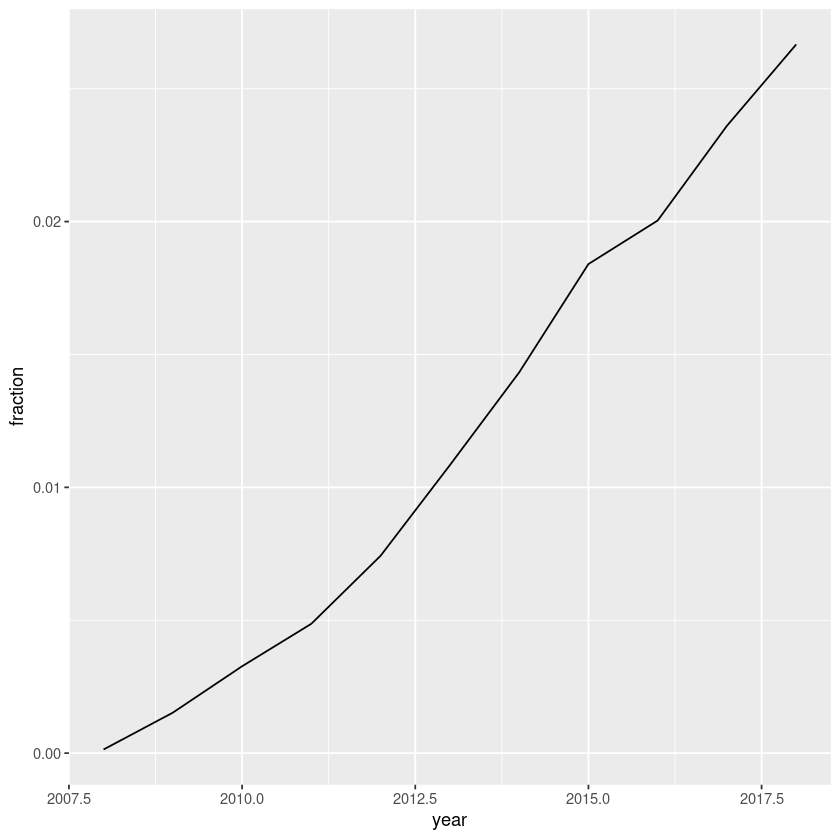

In [7]:
# Load ggplot2
library(ggplot2)

# Create a line plot of fraction over time
ggplot(r_over_time, aes(x = year, y = fraction)) + geom_line()

#   dplyr and ggplot2 change over time
Based on that graph, we that R has been growing pretty fast in the last decade. 

Besides R, two other interesting tags are dplyr and ggplot2.Instead of just looking at R, let's look at all three tags and their change over time. Are each of those tags increasing as a fraction of overall questions? Are any of them decreasing?

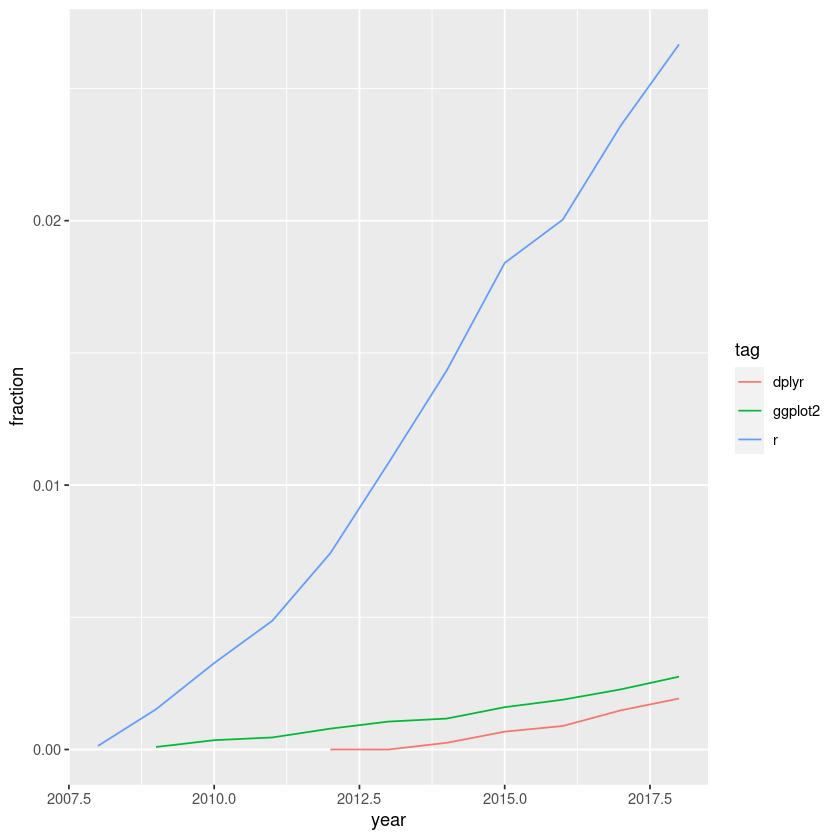

In [8]:
# A vector of selected tags
selected_tags <- c("r","dplyr","ggplot2")

# Filter for those tags
selected_tags_over_time <- by_tag_year_fraction %>%
filter(tag %in% selected_tags)

# Plot tags over time on a line plot using color to represent tag
ggplot(selected_tags_over_time, aes(x = year, y = fraction, color = tag)) + geom_line()

# What are the most asked-about tags?
It's sure been fun to visualize and compare tags over time. The dplyr and ggplot2 tags may not have as many questions as R, but we can tell they're both growing quickly as well.

I'll will like to know which tags have the most questions overall, not just within a particular year. Right now, we have several rows for every tag, but we'll be combining them into one.

In [9]:
# Find total number of questions for each tag

sorted_tags <- by_tag_year %>%
group_by(tag) %>%
summarize(tag_total = sum(number))%>%
arrange(desc(tag_total))

# Print the new table
print(sorted_tags)

# A tibble: 4,080 × 2
   tag        tag_total
   <chr>          <dbl>
 1 javascript   1632049
 2 java         1425961
 3 c#           1217450
 4 php          1204291
 5 android      1110261
 6 python        970768
 7 jquery        915159
 8 html          755341
 9 c++           574263
10 ios           566075
# … with 4,070 more rows


# How have large programming languages changed over time?
We've looked at selected tags like R, ggplot2, and dplyr, and seen that they're each growing. What tags might be shrinking? A good place to start is to plot the tags that we just saw that were the most-asked about of all time, including JavaScript, Java and C#.

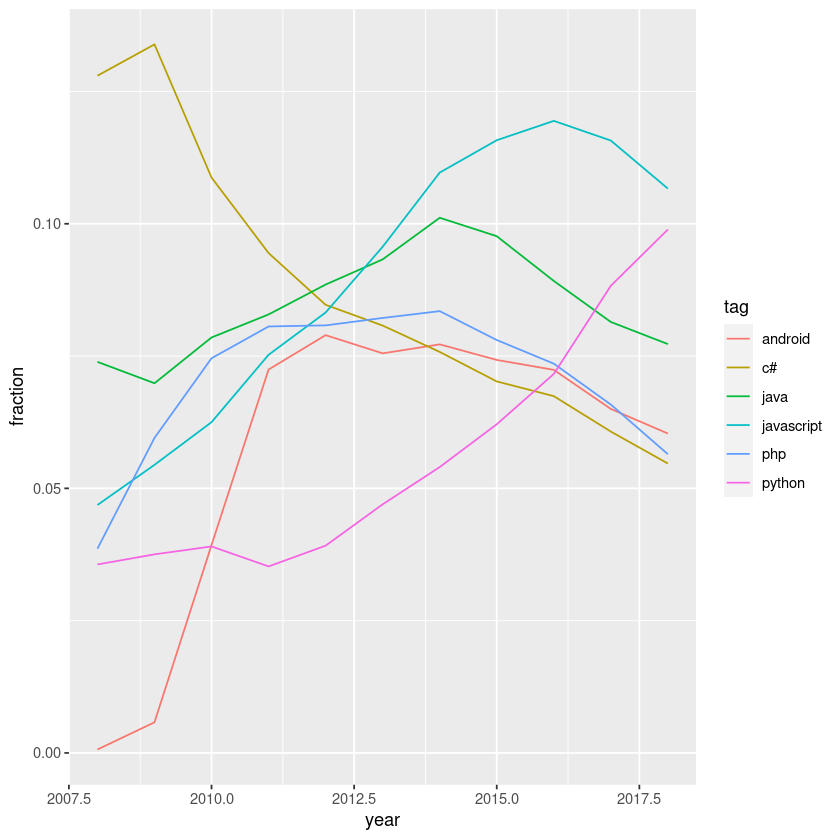

In [10]:
# Get the six largest tags
highest_tags <- head(sorted_tags$tag)

# Filter for the six largest tags
by_tag_subset <- by_tag_year_fraction %>%
filter(tag %in% highest_tags)

# Plot tags over time on a line plot using color to represent tag
ggplot(by_tag_subset, aes(x= year, y = fraction, color = tag)) + geom_line()

# How has the 3 big mobile operating systems compared in popularity over time?
Based on that graph we've seen a lot of changes in what programming languages are most asked about. C# gets fewer questions than it used to, and Python has grown quite impressively.

Now let's check out how three big mobile operating systems (Android, iOS, and Windows Phone) have compared in popularity over time. 

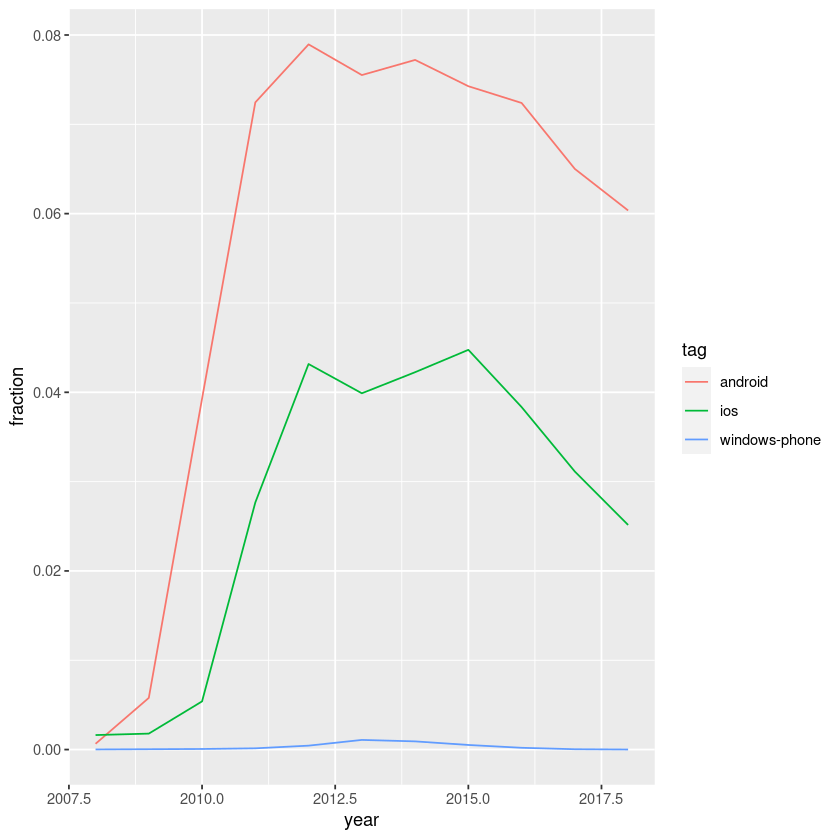

In [11]:
# Get tags of interest
my_tags <- c("android", "ios" ,"windows-phone")


# Filter for those tags
by_tag_subset <- by_tag_year_fraction %>%
filter(tag %in% my_tags)

# Plot tags over time on a line plot using color to represent tag
ggplot(by_tag_subset, aes(x = year, y = fraction, color = tag)) + geom_line()

## What fraction of the total number of questions asked in 2019 had the R tag?

In [15]:
print(by_tag_year2)

# A tibble: 420,066 × 4
    year tag                 number year_total
   <dbl> <chr>                <dbl>      <dbl>
 1  2008 treeview                69     168541
 2  2008 scheduled-tasks         30     168541
 3  2008 specifications          21     168541
 4  2008 rendering               35     168541
 5  2008 http-post                6     168541
 6  2008 static-assert            1     168541
 7  2008 asp.net-ajax           159     168541
 8  2008 collision-detection     10     168541
 9  2008 systray                  4     168541
10  2008 html-helper             20     168541
# … with 420,056 more rows


In [17]:
# Add fraction column
by_tag_year_fraction2 <- by_tag_year2 %>% 
  mutate(fraction2 = number/year_total * 100)

# Filter for R tags in 2019
R_tag_2019 <- by_tag_year_fraction2 %>% 
  filter(tag == "r", year == "2019")

# Print the new table
R_tag_2019

# Save answer as variable
r_percentage <- R_tag_2019 %>% select(fraction2)

year,tag,number,year_total,fraction2
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2019,r,52249,5410632,0.9656728


## What fraction of the total number of questions asked in 2019 had the python tag?

In [18]:

# Filter for python tags in 2019
python_tag_2019 <- by_tag_year_fraction2 %>% 
  filter(tag == "python", year == "2019")

# Print the new table
python_tag_2019

# Save answer as variable
python_percentage <- python_tag_2019 %>% select(fraction2)

year,tag,number,year_total,fraction2
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2019,python,234161,5410632,4.327794


## What were the five most asked-about tags between (2015-2020)? 

In [21]:
# Find total number of questions for each tag in the period 2015-2020
sorted_tags <- by_tag_year %>%
  filter(year >= 2015) %>% 
  group_by(tag) %>% 
  summarize(tag_total = sum(number)) %>% 
  arrange(desc(tag_total))

# Print the new table
print(sorted_tags)

# Get the five largest tags
highest_tags <- head(sorted_tags$tag, n = 5)
# Filter for the five largest tags
by_tag_subset <- by_tag_year_fraction %>% 
  filter(tag %in% highest_tags, year >= 2015)



# A tibble: 4,078 × 2
   tag        tag_total
   <chr>          <dbl>
 1 javascript    905390
 2 java          686870
 3 python        608167
 4 php           549955
 5 android       541329
 6 c#            505242
 7 html          399627
 8 jquery        373627
 9 ios           283732
10 css           276329
# … with 4,068 more rows


# Visualizing change over time
Rather than looking at the results in a table, I'll create a visualization. To take a look at how the fraction of questions about the five most asked-about tags has evolved over the last five years (2015-2020).

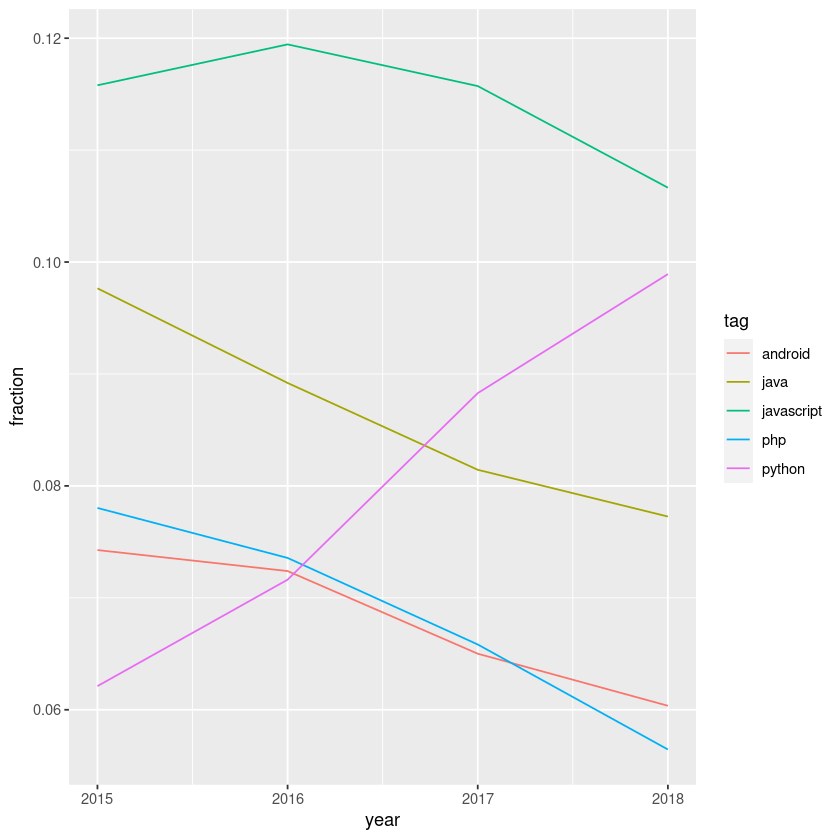

In [22]:
# Plot tags over time on a line plot using color to represent tag
ggplot(by_tag_subset, aes(x = year, y = fraction, color = tag)) +
  geom_line()